In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.ExcelFile(r'E:\Data Analyst\Python\Final_project_RFM\Dataset.xlsx')
order = pd.read_excel(data, 'Orders')
customer = pd.read_excel(data, 'Customer')
return_list = pd.read_excel(data, 'Return')

In [3]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         793 non-null    int64 
 1   Customer ID    793 non-null    object
 2   Customer Name  793 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.7+ KB


In [5]:
return_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [6]:
final_data = order.merge(return_list, on='Order ID', how = 'left').reset_index()
final_data.head()

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
4,4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Yes


In [7]:
final_data = final_data.query('Returned != "Yes"')
final_data

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


# Recency

In [8]:
report_date =  dt.datetime(2017,12,31)
recency = final_data.groupby(['Customer ID']).agg({'Order Date':'max'})
recency

,Order Date
Customer ID,
AA-10315,2017-06-29
AA-10375,2017-12-11
AA-10480,2017-04-15
AA-10645,2016-09-04
AB-10015,2016-11-10
...,...
XP-21865,2017-10-09
YC-21895,2017-12-26
YS-21880,2017-12-21


In [9]:
recency['Recency'] = report_date - recency['Order Date'] 
recency

,Order Date,Recency
Customer ID,,
AA-10315,2017-06-29,185 days
AA-10375,2017-12-11,20 days
AA-10480,2017-04-15,260 days
AA-10645,2016-09-04,483 days
AB-10015,2016-11-10,416 days
...,...,...
XP-21865,2017-10-09,83 days
YC-21895,2017-12-26,5 days
YS-21880,2017-12-21,10 days


In [10]:
rfm_data = pd.merge(recency, customer, on = 'Customer ID', how='inner')
rfm_data.drop(['Row ID', 'Order Date'], axis=1, inplace=True)
rfm_data.drop_duplicates()

,Customer ID,Recency,Customer Name
0,AA-10315,185 days,Alex Avila
1,AA-10375,20 days,Allen Armold
2,AA-10480,260 days,Andrew Allen
3,AA-10645,483 days,Anna Andreadi
4,AB-10015,416 days,Aaron Bergman
...,...,...,...
786,XP-21865,83 days,Xylona Preis
787,YC-21895,5 days,Yoseph Carroll
788,YS-21880,10 days,Yana Sorensen
789,ZC-21910,55 days,Zuschuss Carroll


In [11]:
rfm_data = rfm_data.reindex(columns=['Customer ID', 'Customer Name', 'Recency'])
rfm_data

,Customer ID,Customer Name,Recency
0,AA-10315,Alex Avila,185 days
1,AA-10375,Allen Armold,20 days
2,AA-10480,Andrew Allen,260 days
3,AA-10645,Anna Andreadi,483 days
4,AB-10015,Aaron Bergman,416 days
...,...,...,...
786,XP-21865,Xylona Preis,83 days
787,YC-21895,Yoseph Carroll,5 days
788,YS-21880,Yana Sorensen,10 days
789,ZC-21910,Zuschuss Carroll,55 days


# Frequency

In [12]:
frequency = final_data.groupby('Customer ID').agg({'Order ID':'count'})
frequency

,Order ID
Customer ID,
AA-10315,11
AA-10375,15
AA-10480,12
AA-10645,17
AB-10015,6
...,...
XP-21865,25
YC-21895,7
YS-21880,12


In [13]:
rfm_data = pd.merge(rfm_data, frequency, on='Customer ID', how='inner').rename(columns = {'Order ID':'Frequency'})
rfm_data

,Customer ID,Customer Name,Recency,Frequency
0,AA-10315,Alex Avila,185 days,11
1,AA-10375,Allen Armold,20 days,15
2,AA-10480,Andrew Allen,260 days,12
3,AA-10645,Anna Andreadi,483 days,17
4,AB-10015,Aaron Bergman,416 days,6
...,...,...,...,...
786,XP-21865,Xylona Preis,83 days,25
787,YC-21895,Yoseph Carroll,5 days,7
788,YS-21880,Yana Sorensen,10 days,12
789,ZC-21910,Zuschuss Carroll,55 days,27


# Monetary

In [14]:
monetary = final_data.groupby('Customer ID').agg({'Sales':'sum'}).reset_index()
monetary

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156
...,...,...
786,XP-21865,2110.726
787,YC-21895,5438.650
788,YS-21880,6720.444
789,ZC-21910,7892.998


In [15]:
rfm_data = pd.merge(rfm_data, monetary, on='Customer ID', how='inner').rename(columns = {'Sales':'Monetary'})
rfm_data

,Customer ID,Customer Name,Recency,Frequency,Monetary
0,AA-10315,Alex Avila,185 days,11,5563.560
1,AA-10375,Allen Armold,20 days,15,1056.390
2,AA-10480,Andrew Allen,260 days,12,1790.512
3,AA-10645,Anna Andreadi,483 days,17,5073.975
4,AB-10015,Aaron Bergman,416 days,6,886.156
...,...,...,...,...,...
786,XP-21865,Xylona Preis,83 days,25,2110.726
787,YC-21895,Yoseph Carroll,5 days,7,5438.650
788,YS-21880,Yana Sorensen,10 days,12,6720.444
789,ZC-21910,Zuschuss Carroll,55 days,27,7892.998


In [16]:
rfm_data["R"] = pd.qcut(rfm_data["Recency"],5,labels=[5,4,3,2,1])
rfm_data["F"] = pd.qcut(rfm_data["Frequency"],5,labels=[1,2,3,4,5])
rfm_data["M"] = pd.qcut(rfm_data["Monetary"],5,labels=[1,2,3,4,5])
rfm_data["RFM_Score"] = rfm_data["R"].astype(str) +rfm_data["F"].astype(str) + rfm_data["M"].astype(str)
rfm_data

,Customer ID,Customer Name,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,AA-10315,Alex Avila,185 days,11,5563.560,2,3,5,235
1,AA-10375,Allen Armold,20 days,15,1056.390,5,4,2,542
2,AA-10480,Andrew Allen,260 days,12,1790.512,2,3,3,233
3,AA-10645,Anna Andreadi,483 days,17,5073.975,1,5,5,155
4,AB-10015,Aaron Bergman,416 days,6,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...,...
786,XP-21865,Xylona Preis,83 days,25,2110.726,3,5,3,353
787,YC-21895,Yoseph Carroll,5 days,7,5438.650,5,1,5,515
788,YS-21880,Yana Sorensen,10 days,12,6720.444,5,3,5,535
789,ZC-21910,Zuschuss Carroll,55 days,27,7892.998,4,5,5,455


# Customer Segmentation Dictionary

In [17]:
rfm_dict = {
    "Champions": [555, 554, 544, 545, 454, 455, 445],
    "Loyal": [543, 444, 435, 355, 354, 345, 344, 335],
    "Potential Loyalist": [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
    "New Customers": [512, 511, 422, 421, 412, 411, 311],
    "Promising": [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313],
    "Need Attention": [535, 534, 443, 434, 343, 334, 325, 324],
    "About To Sleep": [331, 321, 312, 221, 213, 231, 241, 251],
    "At Risk": [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
    "Cannot Lose Them": [155, 154, 144, 214,215,115, 114, 113],
    "Hibernating customers": [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211],
    "Lost customers": [111, 112, 121, 131,141,151]
}

In [18]:
def get_rfm_type(score):
    for rfm_type, score_range in rfm_dict.items():
        if score in score_range:
            return rfm_type
rfm_data['CustomerType'] = rfm_data['RFM_Score'].astype(int).apply(get_rfm_type)
rfm_data

,Customer ID,Customer Name,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerType
0,AA-10315,Alex Avila,185 days,11,5563.560,2,3,5,235,At Risk
1,AA-10375,Allen Armold,20 days,15,1056.390,5,4,2,542,Potential Loyalist
2,AA-10480,Andrew Allen,260 days,12,1790.512,2,3,3,233,Hibernating customers
3,AA-10645,Anna Andreadi,483 days,17,5073.975,1,5,5,155,Cannot Lose Them
4,AB-10015,Aaron Bergman,416 days,6,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,Xylona Preis,83 days,25,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,Yoseph Carroll,5 days,7,5438.650,5,1,5,515,Promising
788,YS-21880,Yana Sorensen,10 days,12,6720.444,5,3,5,535,Need Attention
789,ZC-21910,Zuschuss Carroll,55 days,27,7892.998,4,5,5,455,Champions


In [19]:
rfm_data.to_excel(r'E:\Data Analyst\Python\Final_project_RFM\rfm_data.xlsx', index=False)

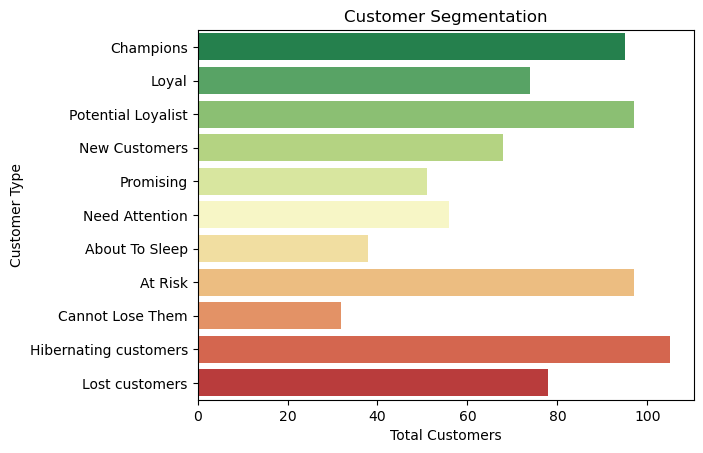

In [20]:
order = ['Champions', 'Loyal', 'Potential Loyalist', 'New Customers', 'Promising', 'Need Attention', 'About To Sleep', 'At Risk', 'Cannot Lose Them', 'Hibernating customers', 'Lost customers']
sns.countplot(y='CustomerType', data = rfm_data, order=order, palette = "RdYlGn_r").set(title='Customer Segmentation', xlabel='Total Customers', ylabel='Customer Type')
plt.show()